In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks/starbucks.csv


In [2]:
df = pd.read_csv('/kaggle/input/starbucks/starbucks.csv')

# Data Wrangling

In [3]:
df.sample(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
114,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,220,3.5,0.4,0.0,0,90,41,1,37,6.0,8%,0%,25%,10%,95
223,Frappuccino® Light Blended Coffee,Caramel,Tall Nonfat Milk,100,0.1,0.0,0.0,0,140,23,0,23,3.0,4%,0%,8%,0%,65
47,Classic Espresso Drinks,Cappuccino,Tall Nonfat Milk,60,0.1,0.1,0.0,5,70,9,0,8,6.0,10%,0%,20%,0%,75
108,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,110,1.5,0.2,0.0,0,45,20,0,18,3.0,4%,0%,10%,6%,50
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
124,Tazo® Tea Drinks,Tazo® Green Tea Latte,Grande Nonfat Milk,290,0.5,0.2,0.0,10,160,57,1,56,14.0,25%,15%,45%,4%,80
167,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,80,0,0.0,0.0,0,0,21,0,21,0.0,0%,0%,0%,0%,Varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6%,0%,20%,8.00%,varies
32,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,200,5,2.5,0.2,20,125,28,0,27,9.0,15%,0%,30%,0%,75
71,Signature Espresso Drinks,Caramel Macchiato,Venti Nonfat Milk,240,1,1.0,0.0,10,170,43,0,41,13.0,25%,0%,40%,0%,150


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [5]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [6]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
for col in df.columns:
    print(df[col].value_counts())
    print("=======================================")

Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: count, dtype: int64
Beverage
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Full-Leaf Tea Latte                              12
Tazo® Green Tea Latte                                  12
Tazo® Chai Tea Latte                                   12
Coffee                                                 12
Hot Chocolate (Without Whipped Cream)                  12
Caramel Macchiato                                      12
Cappuccino                                             12
Vanilla Latte (Or Other Flavoured Latte)               12
Caffè M

In [9]:
df.isna().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
dtype: int64

**Observation:-**

There's 1 null value in Caffeine which we will impute with other value

In [10]:
df.duplicated().sum()

0

**Observation:-**

There's no duplicate rows in dataframe

# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
Beverage_category_grouped = df.drop_duplicates().groupby('Beverage_category')['Beverage'].apply(set).reset_index()

In [13]:
Beverage_category_grouped

,Beverage_category,Beverage
0,Classic Espresso Drinks,"{Espresso, Caffè Mocha (Without Whipped Cream)..."
1,Coffee,{Brewed Coffee}
2,Frappuccino® Blended Coffee,"{Mocha (Without Whipped Cream), Coffee, Carame..."
3,Frappuccino® Blended Crème,"{Strawberries & Crème (Without Whipped Cream),..."
4,Frappuccino® Light Blended Coffee,"{Caramel, Mocha, Coffee, Java Chip}"
5,Shaken Iced Beverages,"{Shaken Iced Tazo® Tea (With Classic Syrup), S..."
6,Signature Espresso Drinks,{White Chocolate Mocha (Without Whipped Cream)...
7,Smoothies,"{Banana Chocolate Smoothie, Strawberry Banana ..."
8,Tazo® Tea Drinks,"{Tazo® Tea, Tazo® Full-Leaf Tea Latte, Tazo® G..."


In [14]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

# **Univarent Analysis**

## Most Famous Beverage Category

In [15]:
# function to find frequency of column
def frequency_graph(col, count = 10):

    # top 10 product in terms of description
    top_category=df[col].value_counts().reset_index().head(count)
    plt.figure(figsize=(20,5))
    sns.barplot(x=top_category[col],y=top_category['count'])
    plt.title(f'Top {count} {col}')
    plt.xticks(rotation=75)  # Rotating x-axis labels for better visibility
    plt.show()

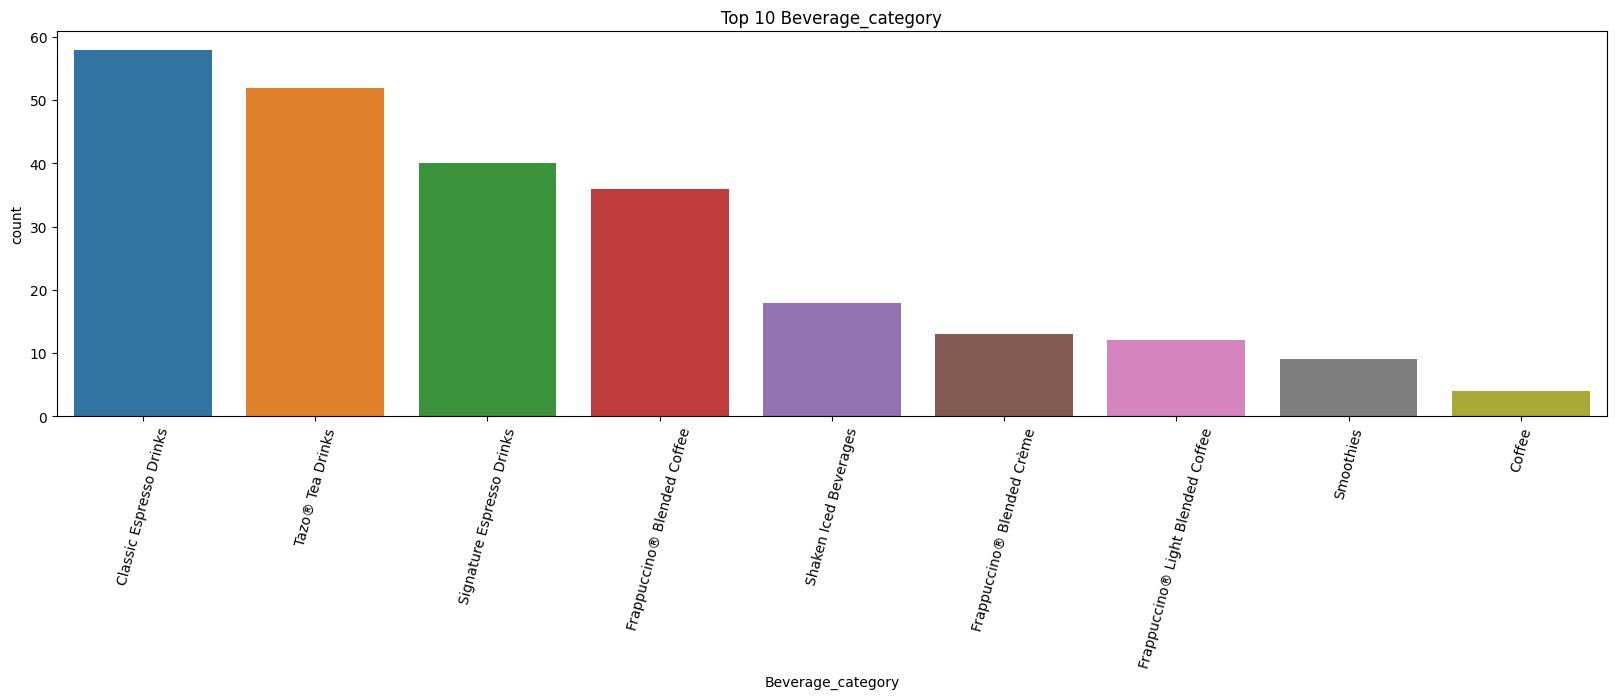

In [16]:
frequency_graph('Beverage_category')

**Observation:**

Classic Expresso Drinks is the most famous drink followed by Tazo Tea Drainks

## Most Famous Beverage

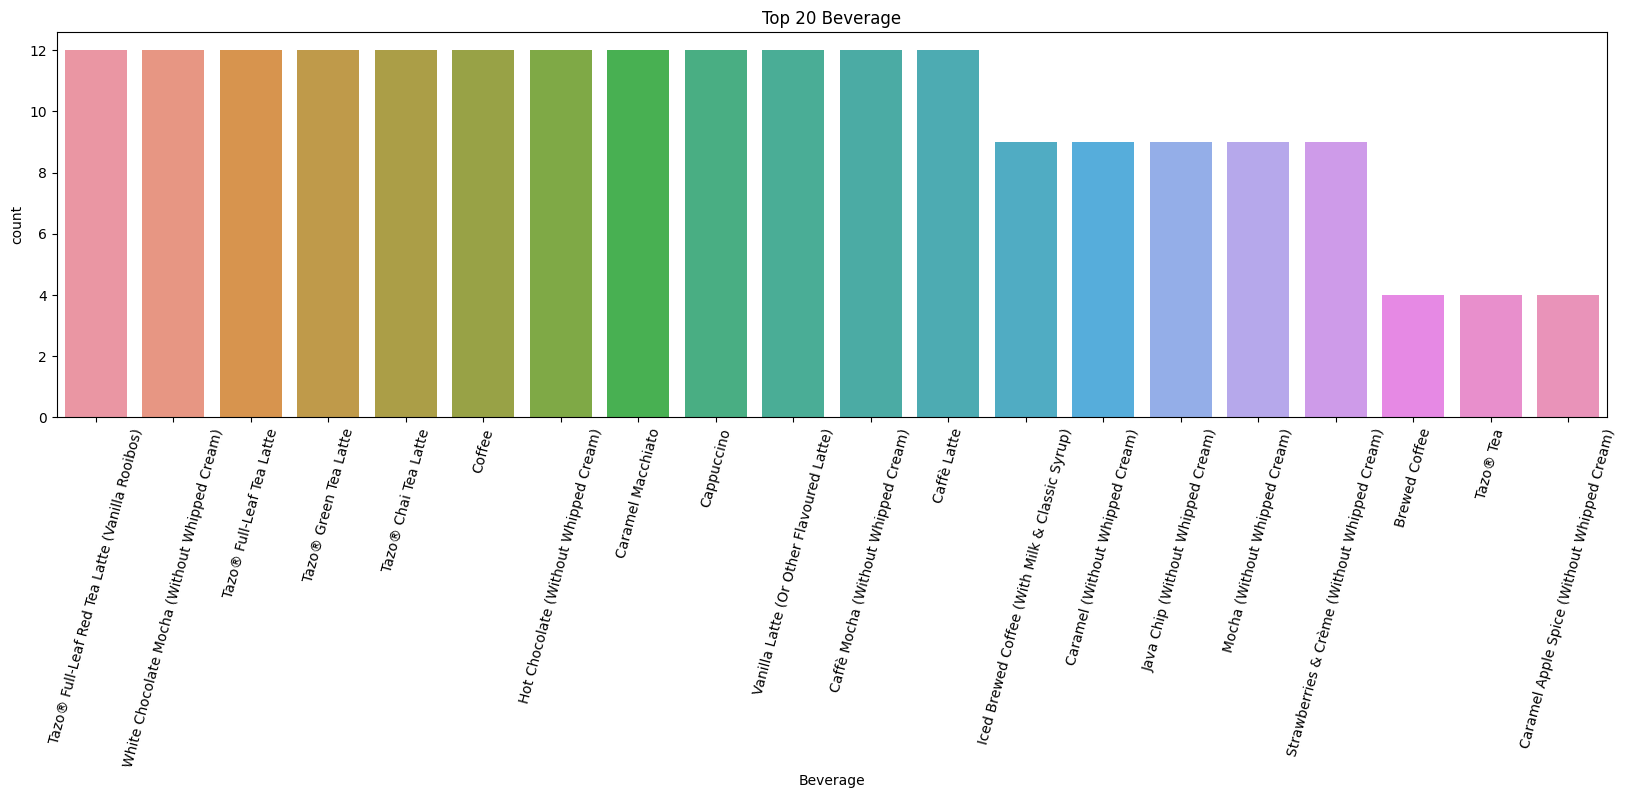

In [17]:
frequency_graph('Beverage', 20)

## Most Famous Beverage Preparation

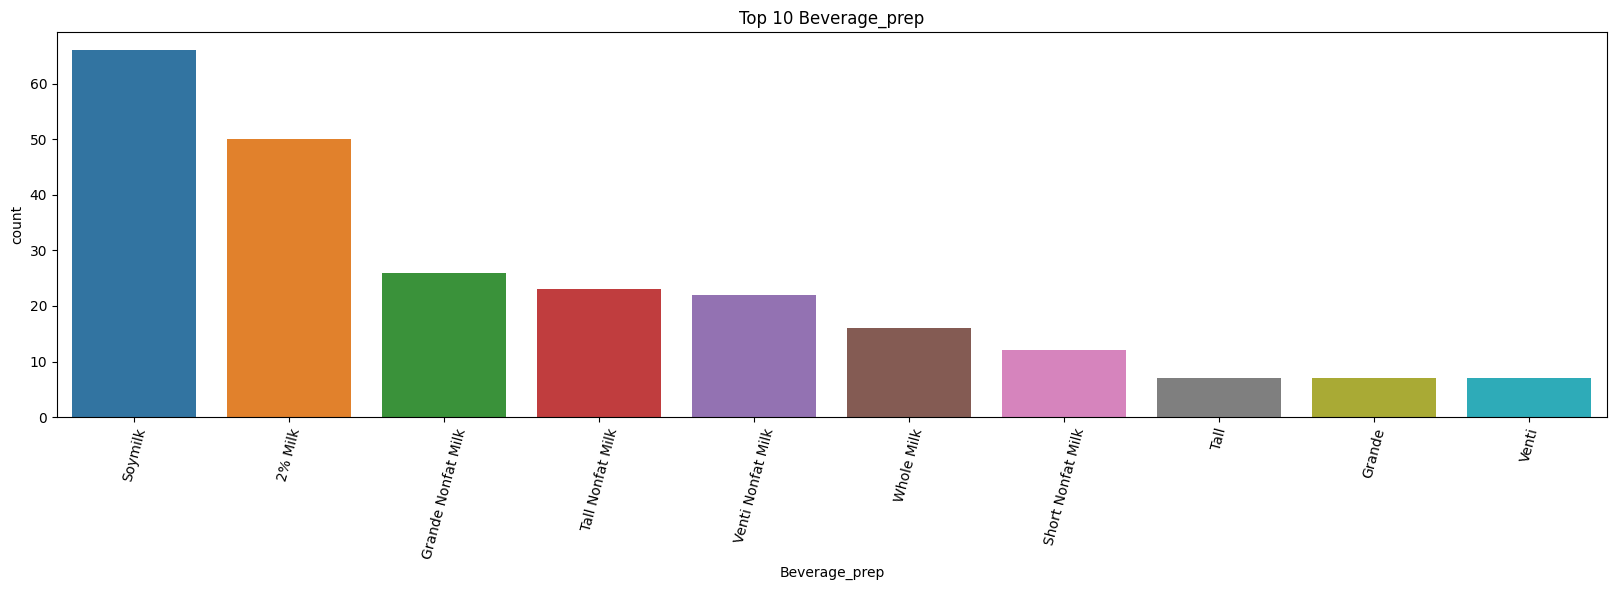

In [18]:
frequency_graph('Beverage_prep')

**Observation:**

Soyamilk is the most famous drink wth count more than 60 followed by 2% Milk with count around 50

# **Bivarent Analysis**

In [19]:
# function to find relation of column
def relation_graph(column):
    
    for col in numerical_col:
      fig = plt.figure(figsize=(7,4))
      ax=fig.gca()
      sns.regplot(x=df[col],y=df[column],scatter_kws={'color':'green'},line_kws={'color':'black'})

In [20]:
# sns.pairplot(df)

In [21]:
numerical_col = df.describe().columns.to_list()

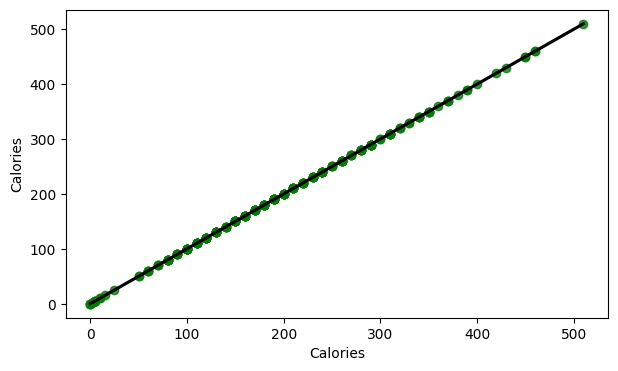

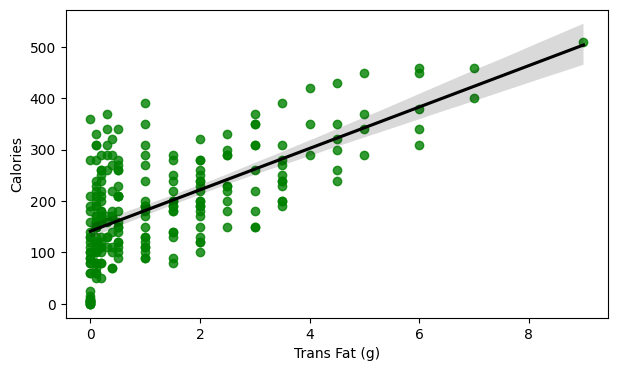

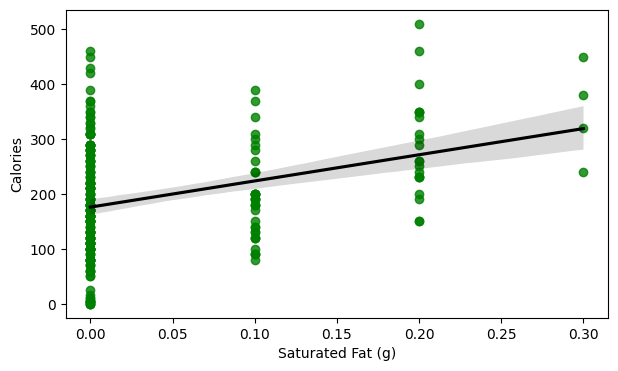

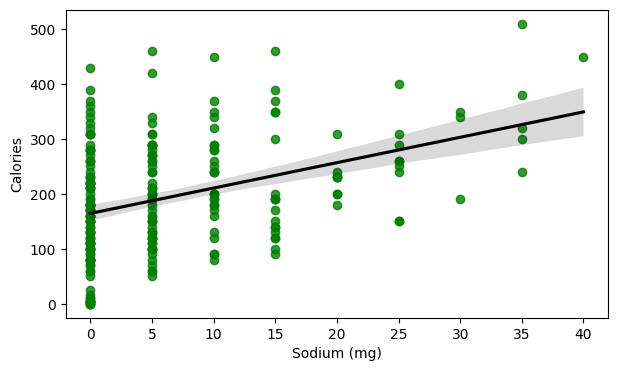

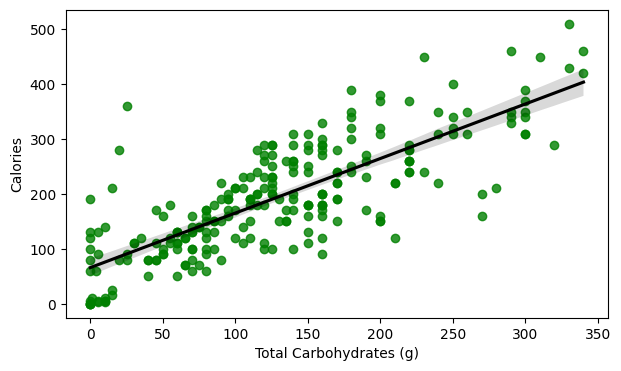

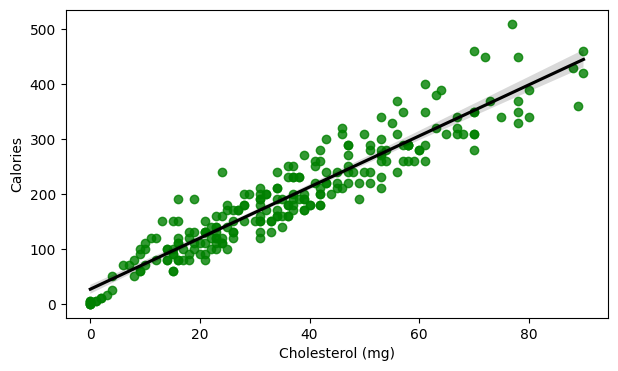

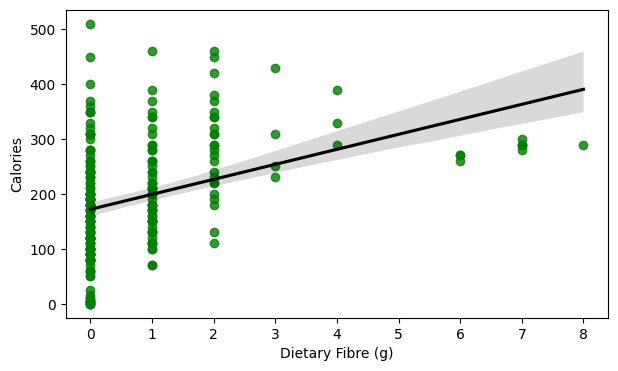

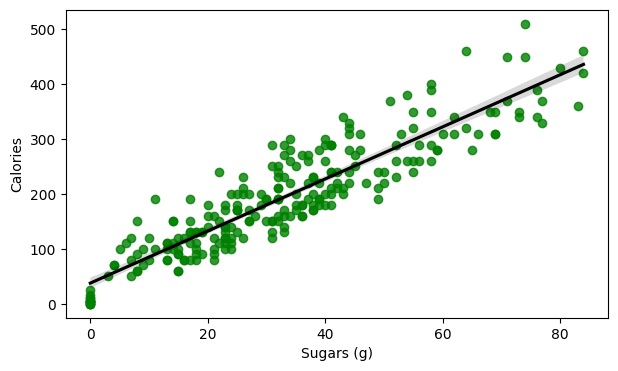

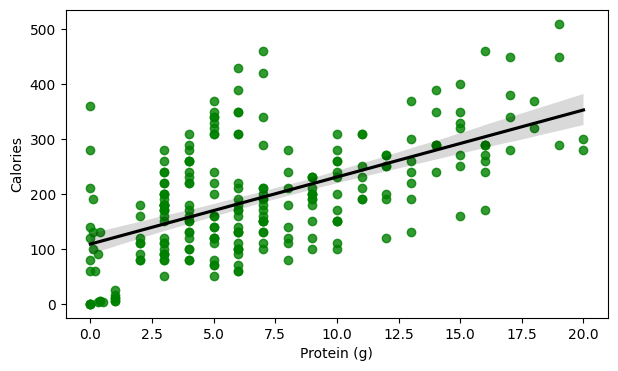

In [22]:
relation_graph('Calories')

**Observation:**

There's increase in every feature with increase in calories

Features like Trans Fat, Carbohydarates, Sugar shows rapid increase for increase in caloriees

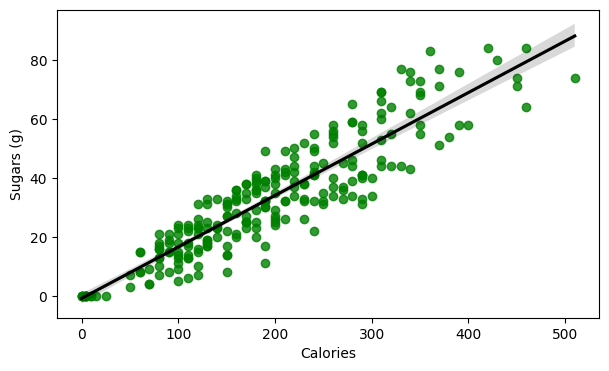

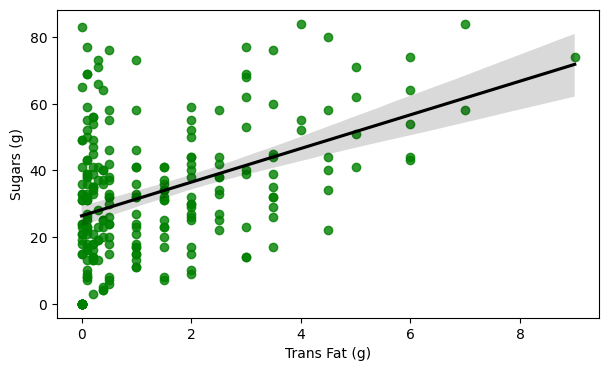

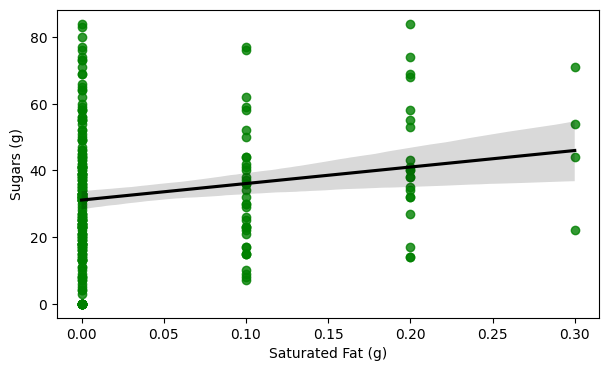

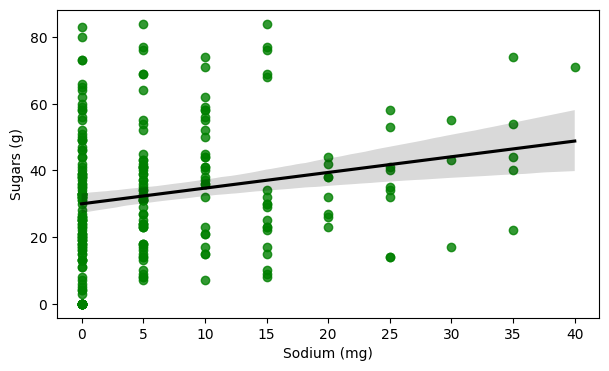

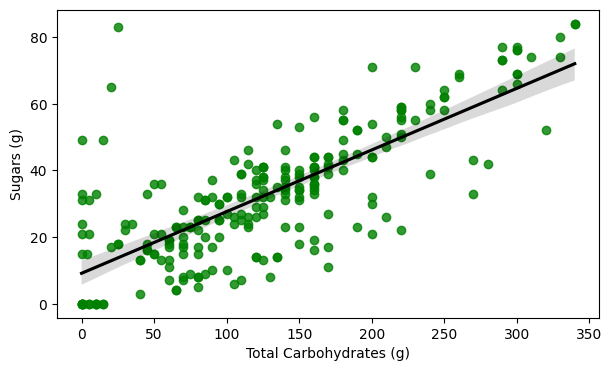

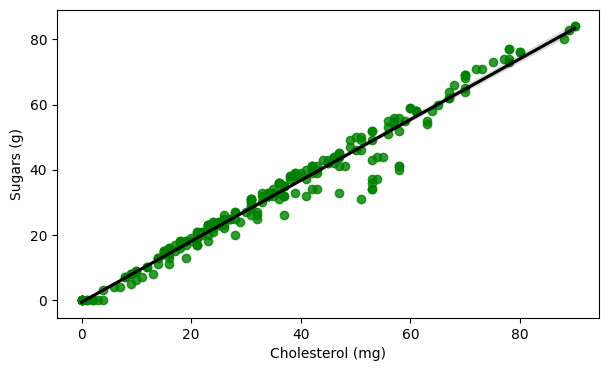

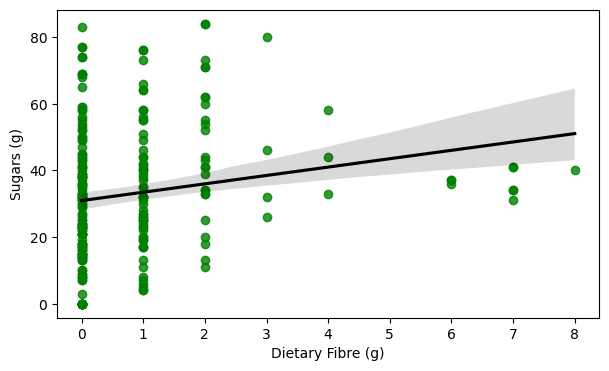

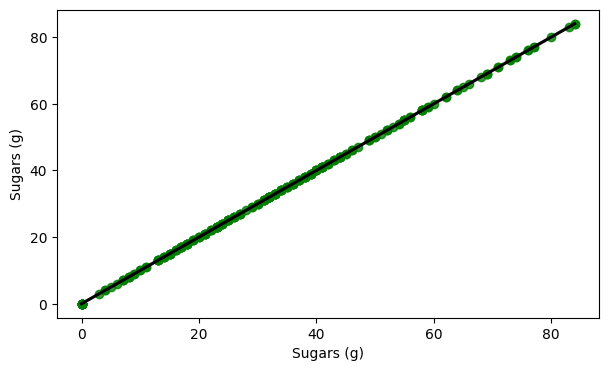

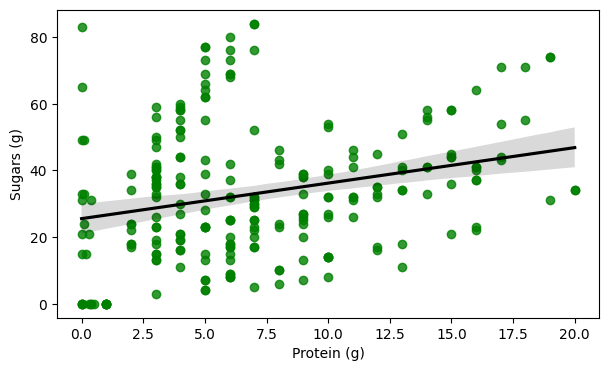

In [23]:
relation_graph('Sugars (g)')

**Observation:**

There's increase in every feature with increase in sugars

Features like Trans Fat, Carbohydarates, Calories shows rapid increase for increase in caloriees

In [24]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [25]:
def show_relation_graph(col1, col2):
    # plot barchar plot for each categorical columns with respect to target variable to get insights
    fig = plt.figure(figsize=(12,5))
    sns.barplot(x=df[col1], y=df[col2])
    plt.xticks(rotation=75)  # Rotating x-axis labels for better visibility

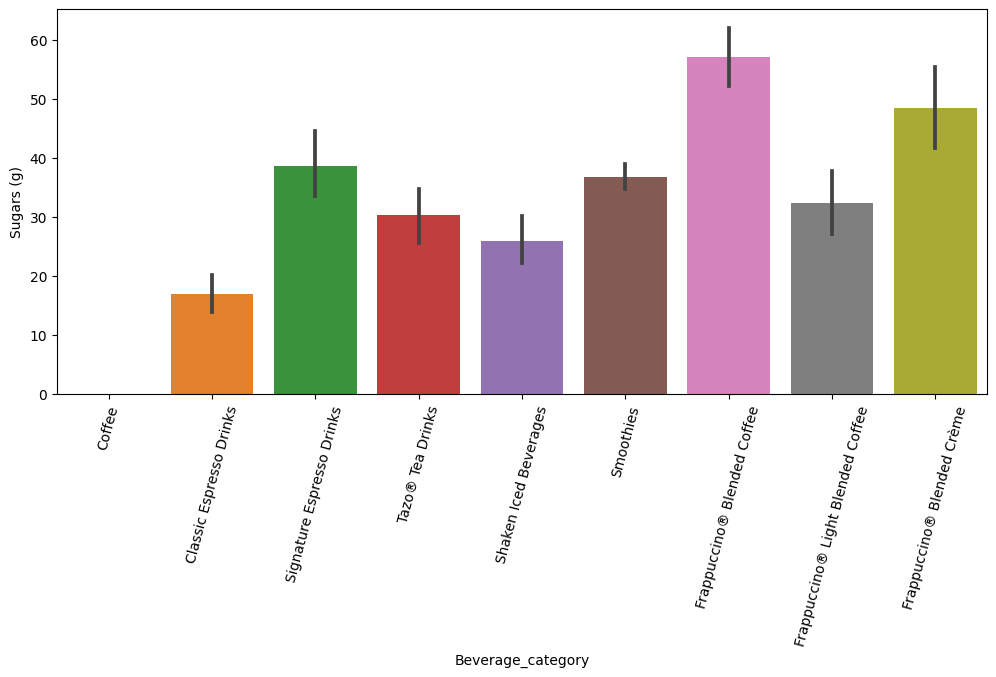

In [26]:
show_relation_graph('Beverage_category', 'Sugars (g)')

**Observation:**

Frappuccinno Light Blended Coffee contains maximum sugar followed by Frappuccinno Blended Creme
Coffee contains no sugar

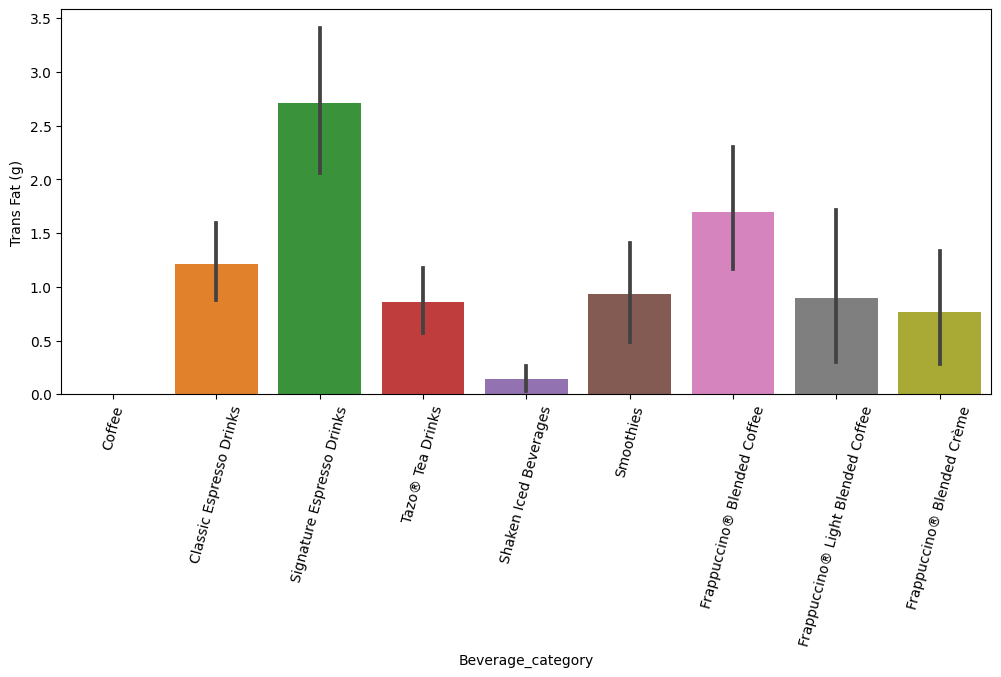

In [27]:
show_relation_graph('Beverage_category', 'Trans Fat (g)')

**Observation:**

Signature Expresso Drinks contains maximum trans fat which is not good for our health.

Coffee contains no trans fat

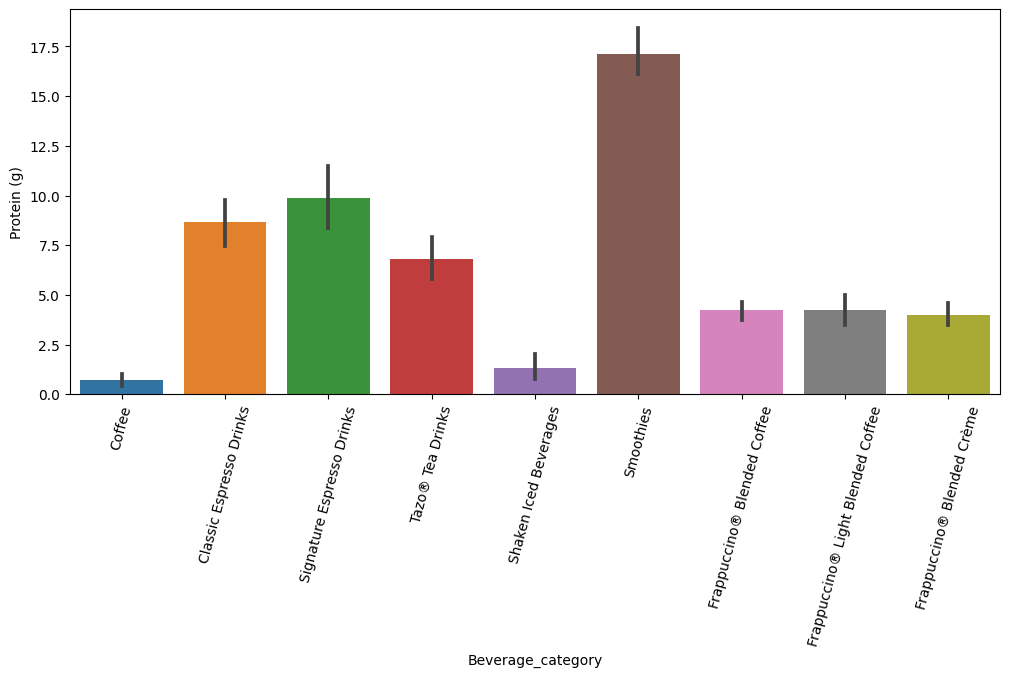

In [28]:
show_relation_graph('Beverage_category', 'Protein (g)')

**Observation:**

Smoothies contains maximum grams of protien
Coffee contains least protien

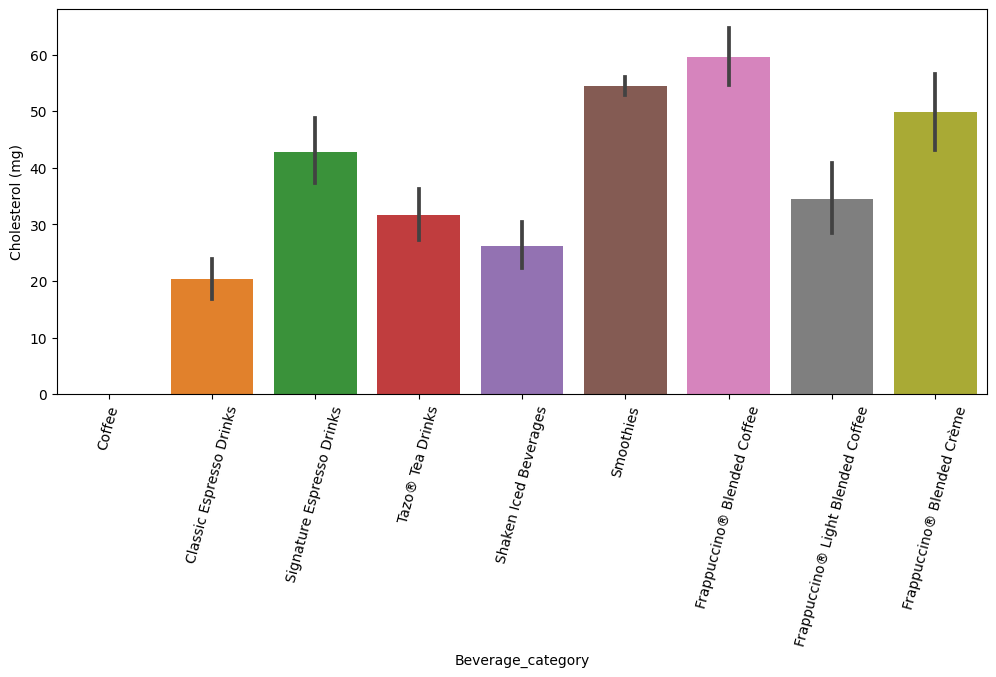

In [29]:
show_relation_graph('Beverage_category', 'Cholesterol (mg)')

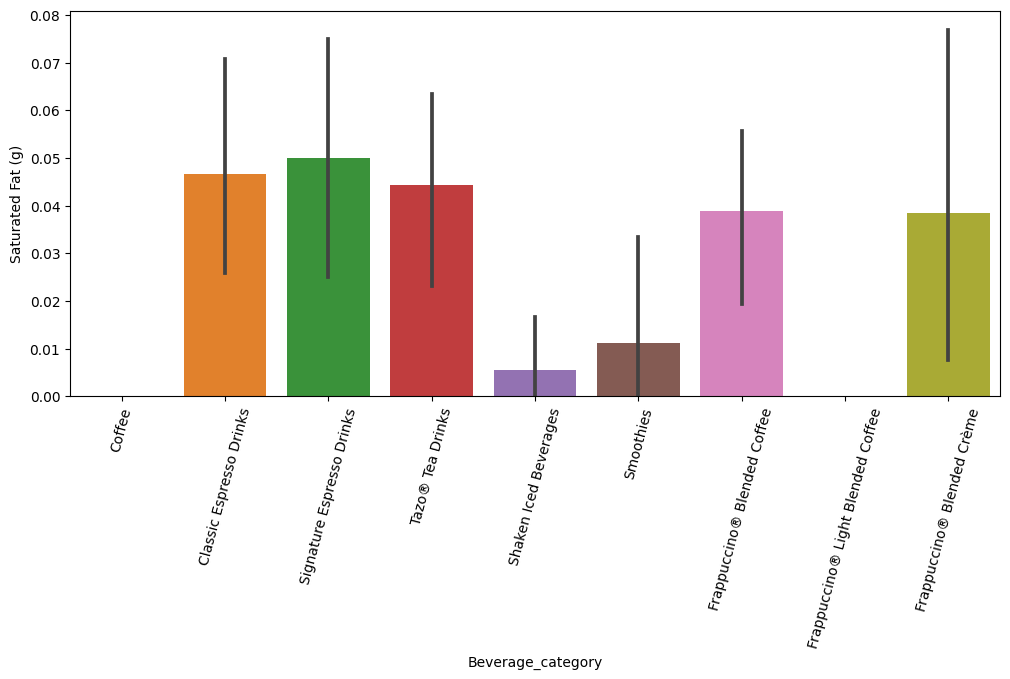

In [30]:
show_relation_graph('Beverage_category', 'Saturated Fat (g)')